# Explore here

In [8]:
# Your code here
# =========================
# Paso 1: Carga de datos
# =========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://breathecode.herokuapp.com/asset/internal-link?id=930&path=diabetes.csv"
df = pd.read_csv(url)

print(df.shape)
df.head()


(768, 9)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00


Distribución de Outcome (0 = no diabetes, 1 = diabetes):
 Outcome
0    500
1    268
Name: count, dtype: int64
Proporción clase positiva: 0.3489583333333333


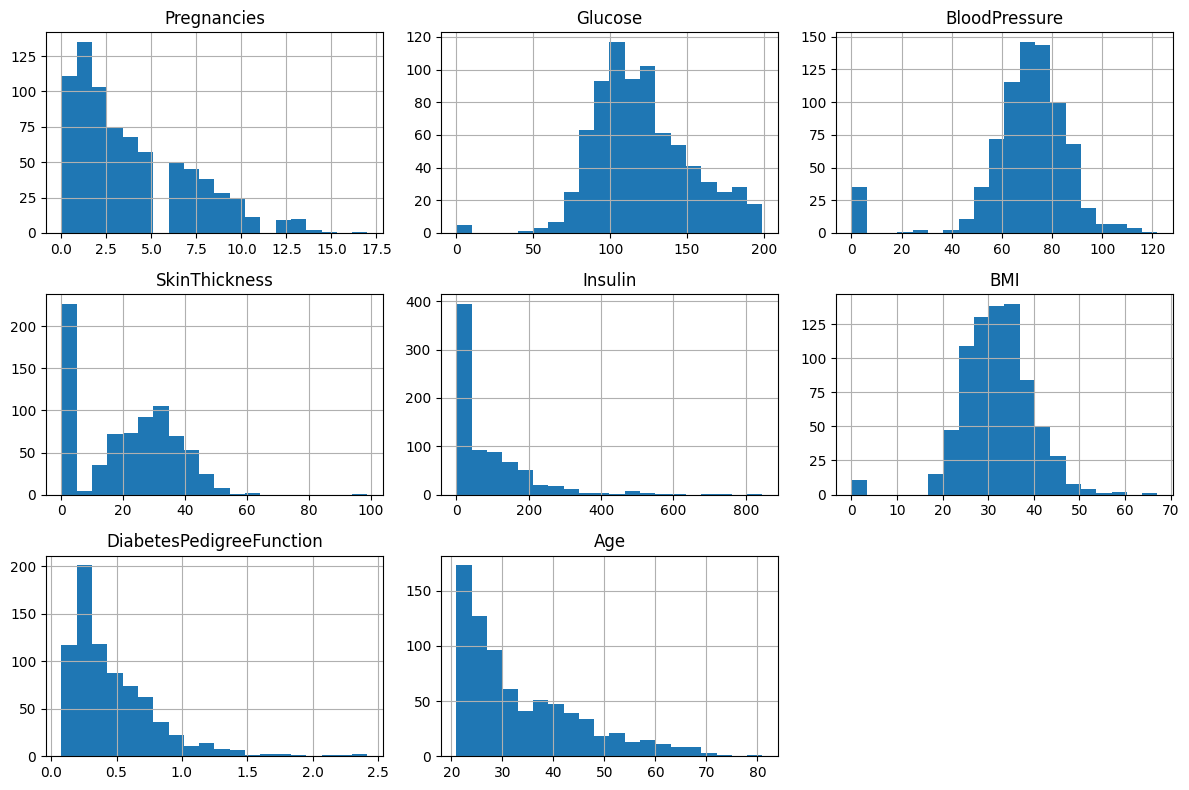

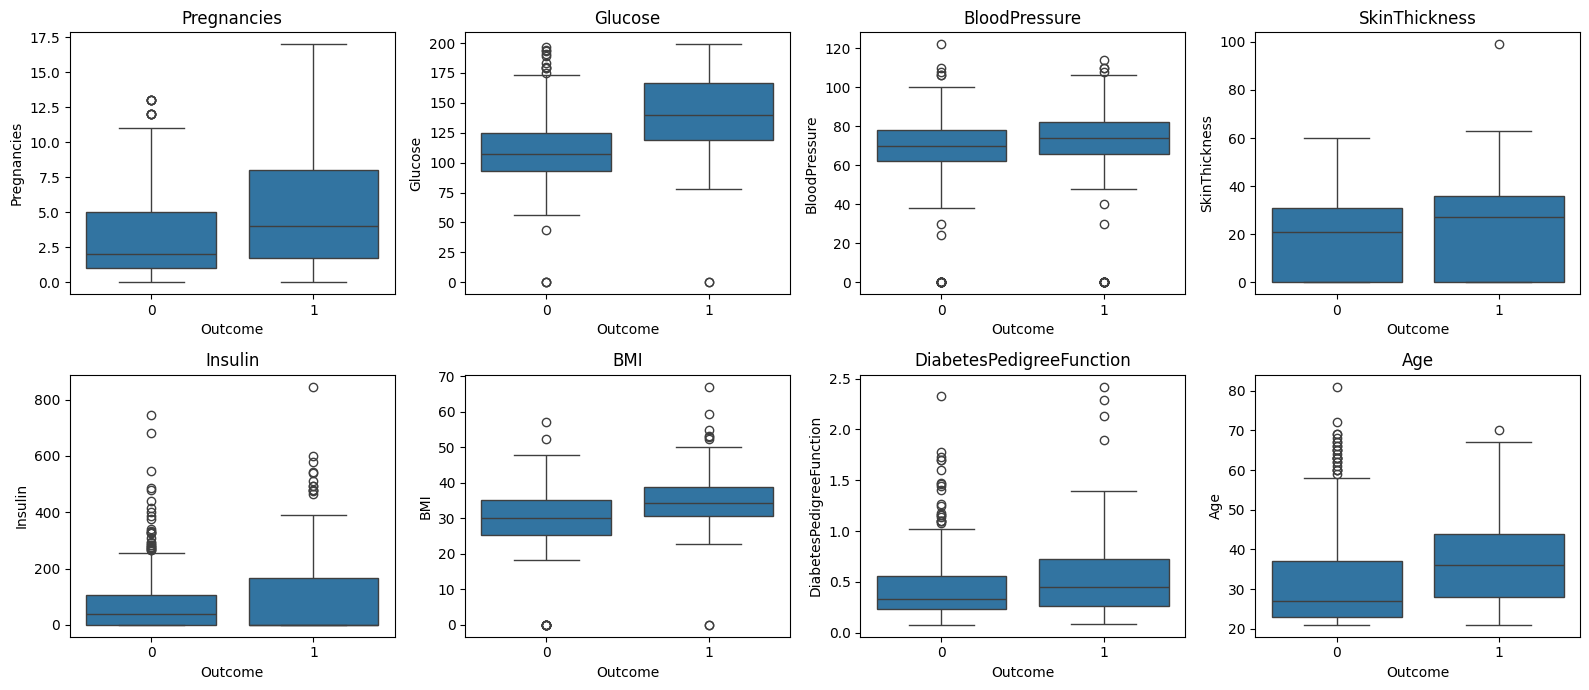

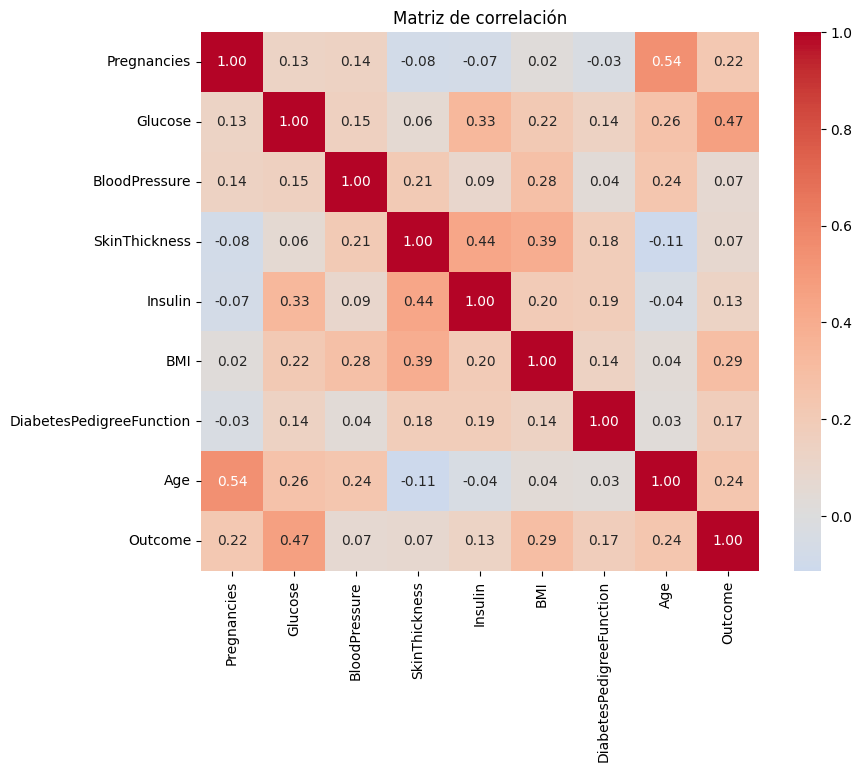

In [9]:
# =========================
# Paso 2: EDA rápido
# =========================
df.info()
display(df.describe().T)

# Balance de la clase
cls_counts = df['Outcome'].value_counts().sort_index()
print("\nDistribución de Outcome (0 = no diabetes, 1 = diabetes):\n", cls_counts)
print("Proporción clase positiva:", cls_counts[1] / cls_counts.sum())

# Univariantes numéricos
_ = df.drop(columns=['Outcome']).hist(bins=20, figsize=(12,8)); plt.tight_layout(); plt.show()

# Bivariantes simples contra Outcome
fig, axes = plt.subplots(2, 4, figsize=(16,7))
axes = axes.ravel()
for i, col in enumerate(df.columns[:-1]):
    sns.boxplot(data=df, x='Outcome', y=col, ax=axes[i])
    axes[i].set_title(col)
plt.tight_layout(); plt.show()

# Correlaciones
plt.figure(figsize=(9,7))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Matriz de correlación"); plt.show()


In [10]:
# =======================================================
# Limpieza: tratar 0 como 'missing' en variables clínicas
# =======================================================
# En este dataset, 0 suele ser "no medido" para estas columnas:
zero_as_na = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

df_clean = df.copy()
for c in zero_as_na:
    df_clean[c] = df_clean[c].replace(0, np.nan)

# Chequeo de nulos introducidos
df_clean.isna().sum()


Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [11]:
# Imputación simple (mediana) para valores faltantes
from sklearn.impute import SimpleImputer

X = df_clean.drop(columns=['Outcome'])
y = df_clean['Outcome']

imputer = SimpleImputer(strategy='median')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Split estratificado (¡muy importante en clasificación!)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y, test_size=0.2, random_state=42, stratify=y
)

X_train.shape, X_test.shape, y_train.mean(), y_test.mean()


((614, 8),
 (154, 8),
 np.float64(0.3485342019543974),
 np.float64(0.35064935064935066))


DecisionTree (gini)
Accuracy: 0.682 | Precision: 0.553 | Recall: 0.481 | F1: 0.515 | ROC-AUC: 0.636


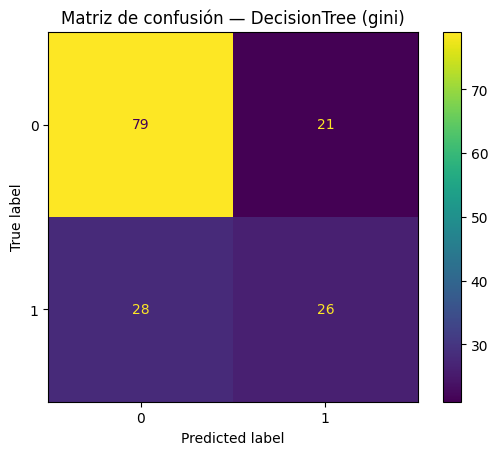


DecisionTree (entropy)
Accuracy: 0.675 | Precision: 0.538 | Recall: 0.519 | F1: 0.528 | ROC-AUC: 0.639


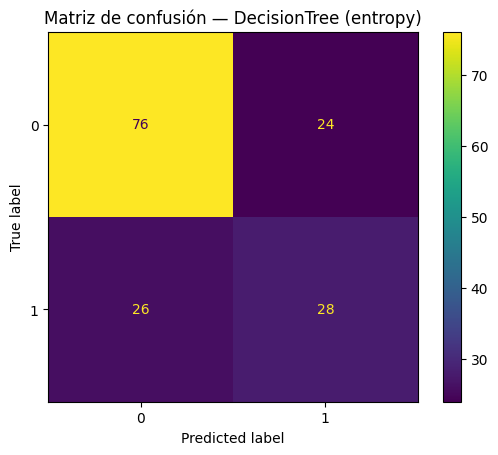


DecisionTree (log_loss)
Accuracy: 0.675 | Precision: 0.538 | Recall: 0.519 | F1: 0.528 | ROC-AUC: 0.639


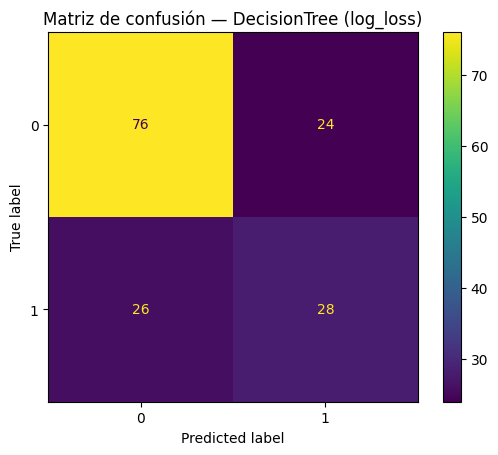

In [12]:
# =============================================
# Paso 3: Árbol de decisión (todas las purezas)
# =============================================
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, ConfusionMatrixDisplay

def eval_model(model, X_tr, y_tr, X_te, y_te, name=""):
    model.fit(X_tr, y_tr)
    y_pred = model.predict(X_te)
    proba = model.predict_proba(X_te)[:,1] if hasattr(model, "predict_proba") else None

    acc  = accuracy_score(y_te, y_pred)
    prec = precision_score(y_te, y_pred, zero_division=0)
    rec  = recall_score(y_te, y_pred, zero_division=0)
    f1   = f1_score(y_te, y_pred, zero_division=0)
    auc  = roc_auc_score(y_te, proba) if proba is not None else np.nan

    print(f"\n{name}")
    print(f"Accuracy: {acc:.3f} | Precision: {prec:.3f} | Recall: {rec:.3f} | F1: {f1:.3f} | ROC-AUC: {auc:.3f}")

    ConfusionMatrixDisplay.from_predictions(y_te, y_pred)
    plt.title(f"Matriz de confusión — {name}")
    plt.show()

    return {"name": name, "acc": acc, "prec": prec, "rec": rec, "f1": f1, "auc": auc, "model": model}

# Algunos sklearn admiten criterion='log_loss' (>=1.1). Lo probamos con try/except.
results = []

for crit in ['gini', 'entropy', 'log_loss']:
    try:
        clf = DecisionTreeClassifier(
            criterion=crit, random_state=42,
            # hiperparámetros base "seguros" para evitar overfitting inicial:
            max_depth=None, min_samples_split=2, min_samples_leaf=1
        )
        res = eval_model(clf, X_train, y_train, X_test, y_test, name=f"DecisionTree ({crit})")
        results.append(res)
    except Exception as e:
        print(f"Saltando criterion={crit} por error: {e}")


name       acc      prec       rec        f1       auc
0      DecisionTree (gini)  0.681818  0.553191  0.481481  0.514851  0.635741
1   DecisionTree (entropy)  0.675325  0.538462  0.518519  0.528302  0.639259
2  DecisionTree (log_loss)  0.675325  0.538462  0.518519  0.528302  0.639259

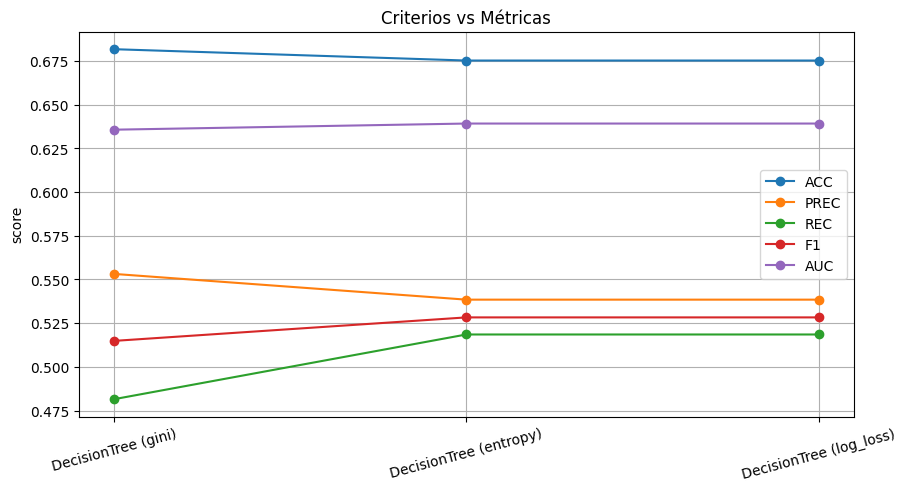

In [13]:
# Comparación gráfica de métricas por criterio
if results:
    df_res = pd.DataFrame([{k:v for k,v in r.items() if k!='model'} for r in results])
    display(df_res[['name','acc','prec','rec','f1','auc']])

    plt.figure(figsize=(10,5))
    for metric in ['acc','prec','rec','f1','auc']:
        plt.plot(df_res['name'], df_res[metric], marker='o', label=metric.upper())
    plt.xticks(rotation=15); plt.ylabel("score"); plt.title("Criterios vs Métricas"); plt.legend(); plt.grid(True); plt.show()


Mejor por AUC/F1: DecisionTree (entropy)


importance
Glucose                     0.277088
DiabetesPedigreeFunction    0.140549
BMI                         0.137650
BloodPressure               0.131495
Pregnancies                 0.096240
Age                         0.089012
Insulin                     0.079433
SkinThickness               0.048532

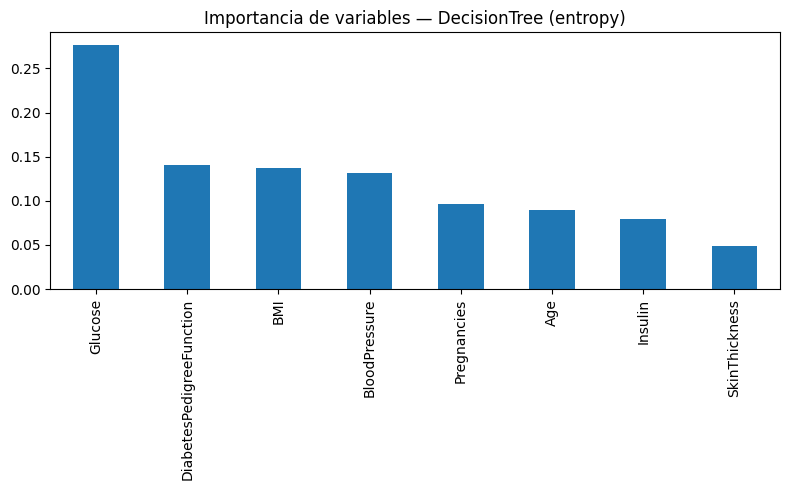

In [14]:
# Importancias de características del mejor resultado (por F1 o AUC)
if results:
    # priorizamos AUC; si es NaN, usamos F1
    best = max(results, key=lambda r: (np.nan_to_num(r['auc'], nan=-1), r['f1']))
    best_model = best['model']
    print("Mejor por AUC/F1:", best['name'])

    importances = pd.Series(best_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
    display(importances.to_frame("importance").head(15))

    plt.figure(figsize=(8,5))
    importances.head(15).plot(kind='bar')
    plt.title(f"Importancia de variables — {best['name']}")
    plt.tight_layout(); plt.show()


Fitting 5 folds for each of 336 candidates, totalling 1680 fits
Mejores hiperparámetros: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 20}
Mejor score CV (ROC-AUC): 0.7810527408637874

DecisionTree — GridSearch (mejor)
Accuracy: 0.727 | Precision: 0.630 | Recall: 0.537 | F1: 0.580 | ROC-AUC: 0.764


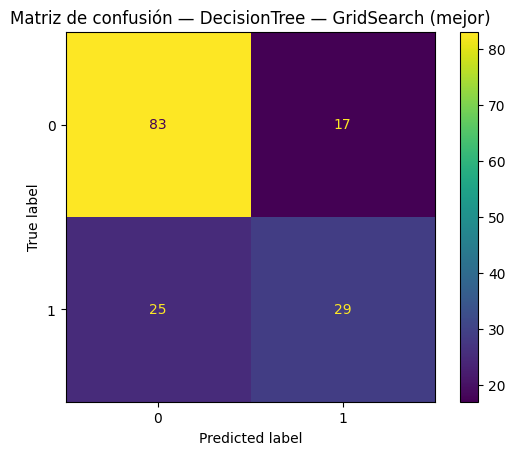

In [15]:
# ===========================================
# Paso 4: Optimización con GridSearch (árbol)
# ===========================================
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Usamos como base el mejor 'criterion' hallado
best_criterion = (best['name'].split("(")[-1].rstrip(")")) if results else 'gini'

base_clf = DecisionTreeClassifier(criterion=best_criterion, random_state=42)

param_grid = {
    "max_depth": [None, 3, 5, 7, 9, 12, 15],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 4, 8],
    "max_features": [None, "sqrt", "log2"]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(
    estimator=base_clf,
    param_grid=param_grid,
    scoring="roc_auc",   # también puedes probar 'f1' o 'balanced_accuracy'
    cv=cv,
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train, y_train)
print("Mejores hiperparámetros:", grid.best_params_)
print("Mejor score CV (ROC-AUC):", grid.best_score_)

best_tree = grid.best_estimator_

# Evaluación final en test
final = eval_model(best_tree, X_train, y_train, X_test, y_test, name="DecisionTree — GridSearch (mejor)")


In [16]:
# =========================
# Paso 5: Guardar el modelo
# =========================
from pickle import dump
dump(best_tree, open("decision_tree_diabetes_best.sav", "wb"))
print("Modelo guardado como: decision_tree_diabetes_best.sav")


Modelo guardado como: decision_tree_diabetes_best.sav
